<a href="https://colab.research.google.com/github/claudinez/Desafio_Kaggle_Iris/blob/main/Desafio_Kaggle_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte 1 - Importação dos Dados do GitHub

In [13]:
#importando a biblioteca necessária
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#caminho direto do Github
df = pd.read_csv("https://raw.githubusercontent.com/claudinez/Desafio_Kaggle_Iris/main/Iris.csv")

# Exibir as 5 primeiras linhas do dataset
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Parte 2 - Entendendo e Explorando o Dataset**

In [19]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Parte 3 – Estrutura e Estatísticas Descritivas**

In [18]:
#df.info()
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# **Parte 4 – Verificação e Limpeza Inicial dos Dados**

In [28]:
# Verificando se há valores nulos
#display("Valores nulos por coluna:")
display(df.isnull().sum())

# Verificando se há linhas duplicadas
display("\nTotal de linhas duplicadas:", df.duplicated().sum())

# Verifica se existem linhas idênticas repetidas.
#df.duplicated().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


'\nTotal de linhas duplicadas:'

np.int64(0)

# **Parte 5 – Distribuição das Espécies**

'Distribuição das espécies:'

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


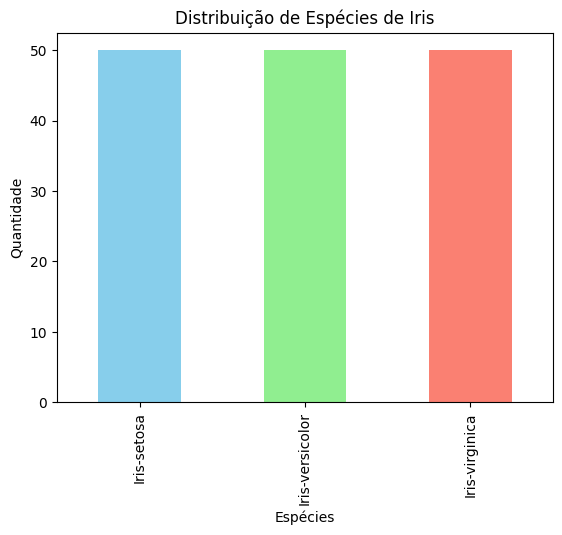

In [30]:
# Contando quantas observações existem para cada espécie
display("Distribuição das espécies:")
display(df['Species'].value_counts())

# Visualizando graficamente com um gráfico de barras simples
import matplotlib.pyplot as plt

df['Species'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Distribuição de Espécies de Iris")
plt.xlabel("Espécies")
plt.ylabel("Quantidade")
plt.show()

# ** Estatísticas e gráficos por espécie com Seaborn**

/tmp/ipython-input-3468013318.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y="SepalLengthCm", data=df, palette="Set2")


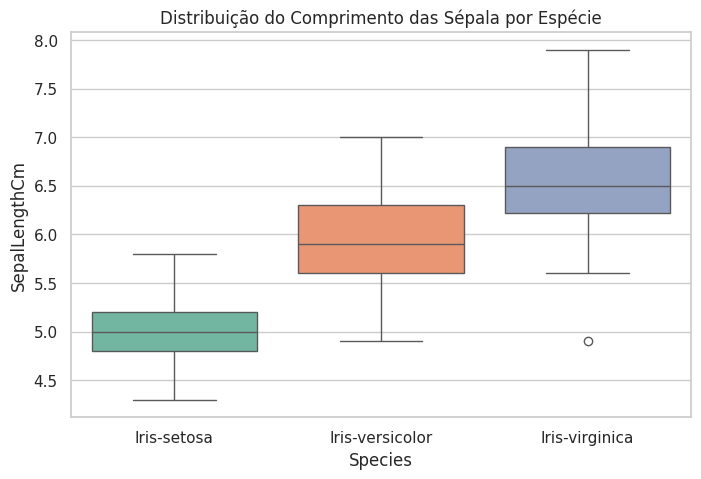

/tmp/ipython-input-3468013318.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y="PetalLengthCm", data=df, palette="Set3")


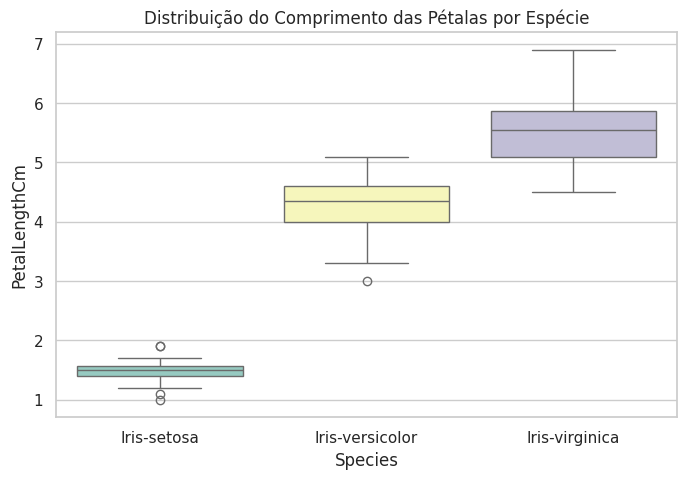

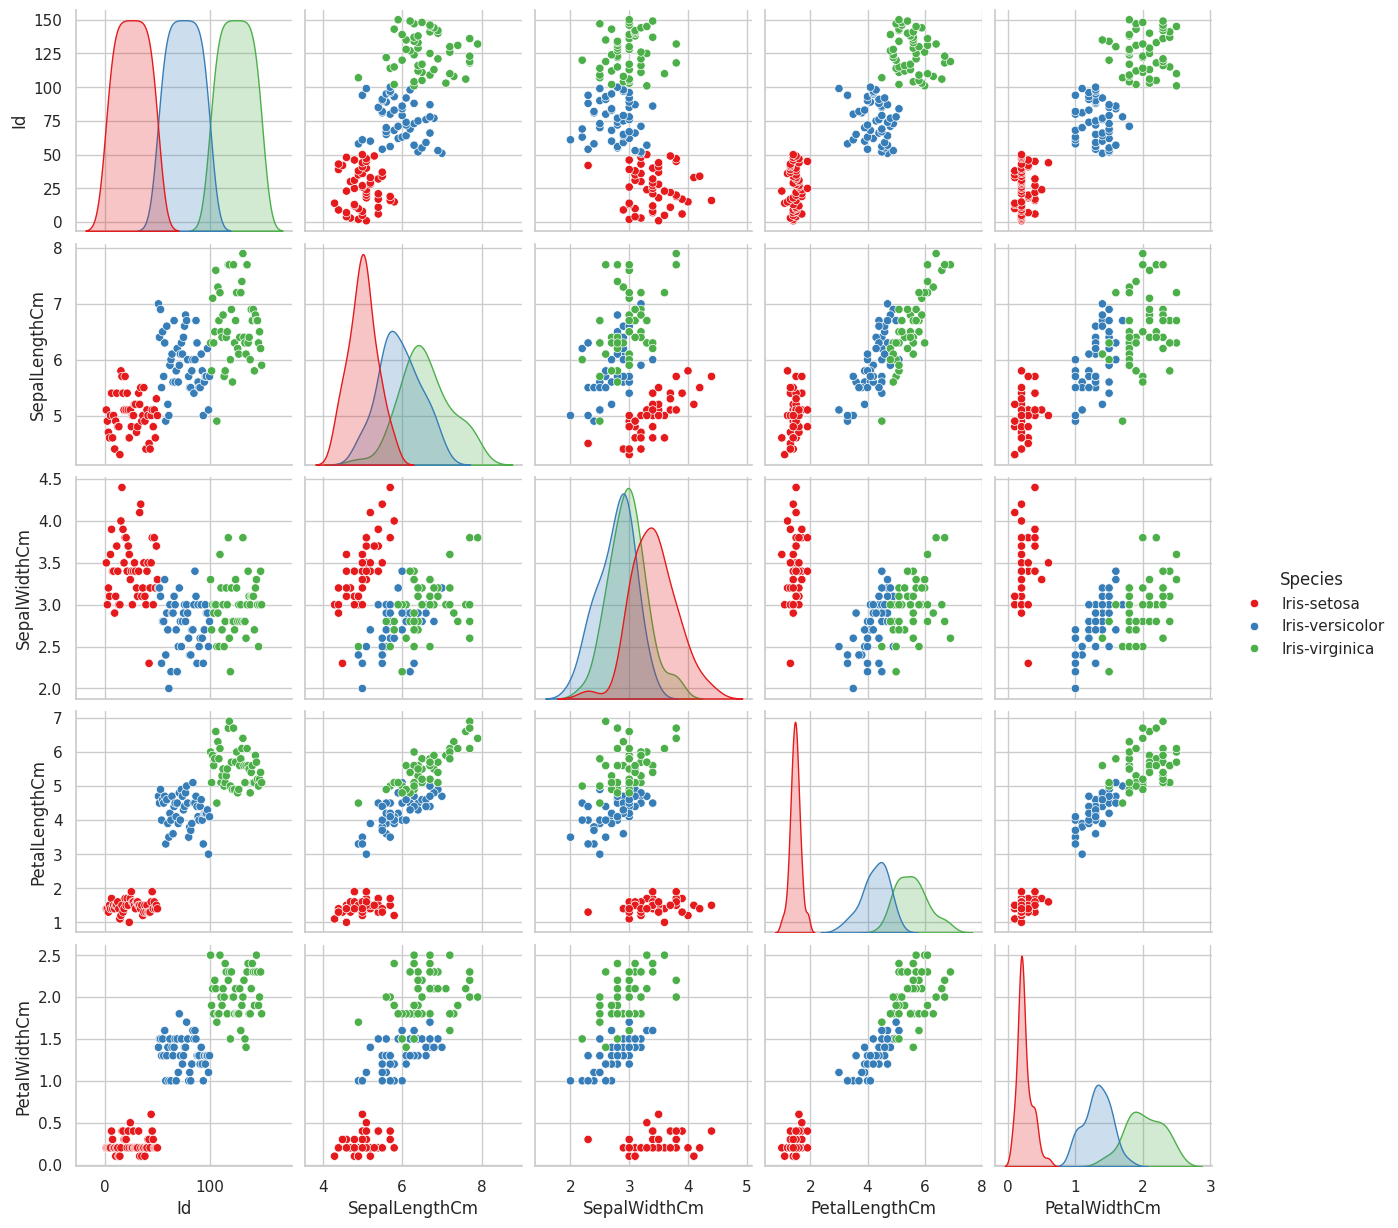

In [31]:
# Importando Seaborn e Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustes estéticos do Seaborn
sns.set(style="whitegrid")

# 1️⃣ Boxplot do comprimento das sépalas por espécie
plt.figure(figsize=(8,5))
sns.boxplot(x="Species", y="SepalLengthCm", data=df, palette="Set2")
plt.title("Distribuição do Comprimento das Sépala por Espécie")
plt.show()

# 2️⃣ Boxplot do comprimento das pétalas por espécie
plt.figure(figsize=(8,5))
sns.boxplot(x="Species", y="PetalLengthCm", data=df, palette="Set3")
plt.title("Distribuição do Comprimento das Pétalas por Espécie")
plt.show()

# 3️⃣ Pairplot para visualizar relações entre todas as medidas
sns.pairplot(df, hue="Species", palette="Set1")
plt.show()

# **(Plotly) – Análise Interativa - Gráfico**

In [43]:
import plotly.express as px

# -------------------------------
# 1️⃣ Gráfico de barras: contagem de espécies
# -------------------------------
species_counts = df['Species'].value_counts().reset_index()
species_counts.columns = ['Species', 'Count']  # renomeia colunas para ficar claro

fig = px.bar(species_counts,
             x='Species',
             y='Count',
             color='Species',
             title='Distribuição das Espécies de Iris')
fig.show()

# -------------------------------
# 2️⃣ Boxplot interativo do comprimento das sépalas por espécie
# -------------------------------
fig = px.box(df, x='Species', y='SepalLengthCm',
             color='Species',
             title='Distribuição do Comprimento das Sépala por Espécie')
fig.show()

# -------------------------------
# 3️⃣ Boxplot interativo do comprimento das pétalas por espécie
# -------------------------------
fig = px.box(df, x='Species', y='PetalLengthCm',
             color='Species',
             title='Distribuição do Comprimento das Pétalas por Espécie')
fig.show()

# -------------------------------
# 4️⃣ Scatter Matrix interativo (dispersão das medidas)
# -------------------------------
# Criando DataFrame apenas com colunas numéricas + Species
numeric_df = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]

fig = px.scatter_matrix(numeric_df,
                        dimensions=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                        color='Species',
                        title='Dispersão das Medidas das Flores por Espécie',
                        symbol='Species')
fig.update_traces(diagonal_visible=False)
fig.show()


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Separando features (X) e target (y)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# 2️⃣ Codificando a variável target (string -> números)
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Iris-setosa -> 0, Iris-versicolor -> 1, Iris-virginica -> 2

# 3️⃣ Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 4️⃣ Verificando shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (120, 4)
X_test: (30, 4)
y_train: (120,)
y_test: (30,)


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ Inicializando os modelos
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 2️⃣ Treinando e avaliando cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)  # treinamento
    y_pred = model.predict(X_test)  # previsão
    print(f"\nModelo: {name}")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))



Modelo: KNN
Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Matriz de Confusão:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Modelo: Decision Tree
Acurácia: 0.9333333333333333
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Matriz de Confusão:
 [[10  0  0]
 [ 0  9  1